In [106]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input,Dropout,LSTM
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam


In [107]:
import pickle
# Specify the path to your pickle file
file_path1 = 'D:\Schzo\Training_Models\Best_Model_Saved\Raw_Healthy.pkl'
file_path2 = 'D:\Schzo\Training_Models\Best_Model_Saved\Raw_Schizopherina.pkl'
with open(file_path1, 'rb') as f:
    # Load the contents of the pickle file
    data_1 = pickle.load(f)
with open(file_path2, 'rb') as f:
    # Load the contents of the pickle file
    data_2 = pickle.load(f)

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4736\2168953232.py:3: SyntaxWarning: invalid escape sequence '\S'
  file_path1 = 'D:\Schzo\Training_Models\Best_Model_Saved\Raw_Healthy.pkl'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4736\2168953232.py:4: SyntaxWarning: invalid escape sequence '\S'
  file_path2 = 'D:\Schzo\Training_Models\Best_Model_Saved\Raw_Schizopherina.pkl'


In [108]:
def minmax_scale_channel(channel_data):
    channel_reshaped = np.reshape(channel_data, (2, -1))
    min_vals = np.min(channel_reshaped, axis=1, keepdims=True)
    max_vals = np.max(channel_reshaped, axis=1, keepdims=True)
    scaled_channel = (channel_reshaped - min_vals) / (max_vals - min_vals)
    scaled_channel = np.reshape(scaled_channel, channel_data.shape)
    return scaled_channel

In [109]:
def Customized_train_test_split(data_1):
    data_1_split = np.array([data[0] for data in data_1])  # Features
    data_1_y = np.array([data[1] for data in data_1])  # Labels
    data_1_normalized = np.array([minmax_scale_channel(chunk) for chunk in data_1_split])
    data_1_normalized = np.reshape(data_1_normalized, (*data_1_normalized.shape, 1))
    X_train1, X_test1, y_train1, y_test1 = train_test_split(data_1_normalized, data_1_y, test_size=0.2, random_state=42)
    return  X_train1, X_test1, y_train1, y_test1


In [110]:
X_train1, X_test1, y_train1, y_test1=Customized_train_test_split(data_1)
X_train2, X_test2, y_train2, y_test2=Customized_train_test_split(data_2)
X_train = np.concatenate((X_train1, X_train2), axis=0)
X_test = np.concatenate((X_test1, X_test2), axis=0)
y_train = np.concatenate((y_train1, y_train2), axis=0)
y_test = np.concatenate((y_test1, y_test2), axis=0)


In [114]:

combined_data = data_1 + data_2
np.random.shuffle(combined_data)
X = np.array([data[0] for data in combined_data])
y = np.array([data[1] for data in combined_data])
data_1_normalized = np.array([minmax_scale_channel(chunk) for chunk in X])
data_1_normalized = np.reshape(data_1_normalized, (*data_1_normalized.shape, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_1_normalized, y, test_size=0.3, random_state=42)

In [115]:
_,a,b,c=X_train.shape
inputs = Input(shape=(a,b,c))
x = Conv2D(10, (1,50) ,activation='relu')(inputs)
x = MaxPooling2D((1, 2),)(x)
x = Conv2D(16, (1,30) ,activation='relu')(x)
x = Conv2D(16, (2,1) ,activation='relu')(x)
x = MaxPooling2D((1, 4))(x)
x = Flatten()(x)
x = Dense(20, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs, outputs)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "functional_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_41 (InputLayer)     │ (None, 2, 2500, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 2, 2451, 10)    │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_78 (MaxPooling2D) │ (None, 2, 1225, 10)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_92 (Conv2D)              │ (None, 2, 1196, 16)    │         4,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 1, 1196, 16)    │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_79 (MaxPooling2D) │ (None, 1, 299, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_39 (Flatten)            │ (None, 4784)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 20)             │        95,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,575 (396.78 KB)

 Trainable params: 101,575 (396.78 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
X_train.shape

(2059, 2, 2500, 1)

In [116]:
# Assuming you have your X_train, y_train, X_test, and y_test datasets ready

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.4)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)


print("Test Accuracy:", accuracy)
print("Test Loss:", loss)


Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5034 - loss: 0.6916 - val_accuracy: 0.5340 - val_loss: 0.6896
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5251 - loss: 0.6903 - val_accuracy: 0.5340 - val_loss: 0.6890
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5202 - loss: 0.6872 - val_accuracy: 0.5340 - val_loss: 0.6849
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5365 - loss: 0.6840 - val_accuracy: 0.5340 - val_loss: 0.6784
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5520 - loss: 0.6548 - val_accuracy: 0.5465 - val_loss: 0.6426
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6011 - loss: 0.6132 - val_accuracy: 0.6491 - val_loss: 0.5907
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6701 - loss: 0.5572 - val_accuracy: 0.7670 - val_loss: 0.5621
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7555 - loss: 0.5233 - val_accuracy: 0.7101 - v

In [117]:
model.save("RAW_MODEL.keras")

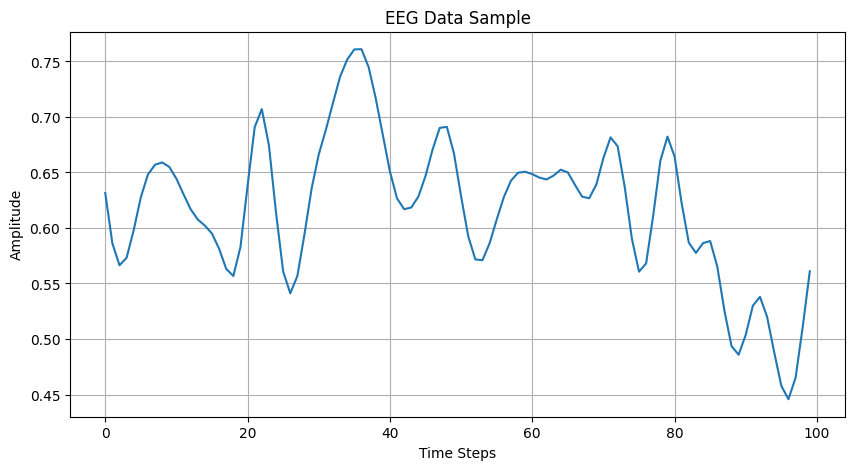

In [76]:
import matplotlib.pyplot as plt

# Get the first sample from X_train
sample = X_train[0]

# Reshape the sample if necessary (remove singleton dimensions)
sample = sample.squeeze()

# Plot the sample
plt.figure(figsize=(10, 5))
plt.plot(sample[0][0:100])
plt.title('EEG Data Sample')
plt.xlabel('Time Steps')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
